# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [79]:
import main
import numpy as np
import scipy
import scipy.interpolate
import matplotlib
import matplotlib.pyplot as plt

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

def PolyCoefficientsCubic(x, x0, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x-x0)**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


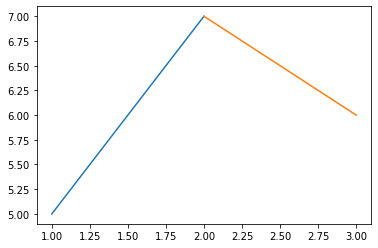

In [80]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))


***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


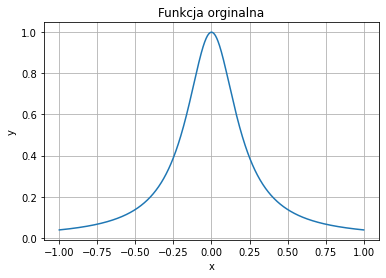

In [81]:
from main import first_spline, bar_czeb_weights, barycentric_inte, L_inf

f_zad2 = lambda x: 1 / (25* x * x +1)
x = np.linspace(-1,1,1000)
y = np.array(f_zad2(x))

n=200
x_for_int = np.linspace(-1,1,n)
y_for_int = np.array(f_zad2(x_for_int))

plt.plot(x,y)
plt.title("Funkcja orginalna")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

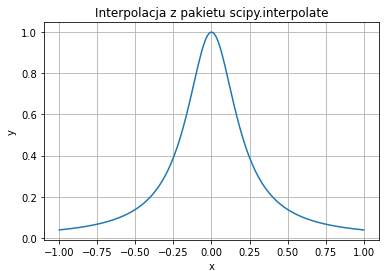

Błąd interpolacji  dla pakietowej funkcji: 3.3306690738754696e-16



In [82]:
y_sprep = scipy.interpolate.splprep([x_for_int, y_for_int],s=0)
y_scipy = scipy.interpolate.splev(y_sprep[1], y_sprep[0])

plt.plot(y_scipy[0], y_scipy[1])
plt.title("Interpolacja z pakietu scipy.interpolate")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
y_for_error = f_zad2(np.linspace(-1,1, np.size(y_scipy[0])))
error_scipy = L_inf(y_for_error, y_scipy[1])
print("Błąd interpolacji  dla pakietowej funkcji: {}\n".format(error_scipy))

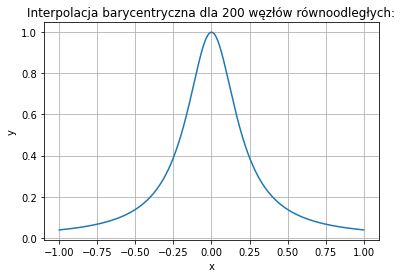

Błąd interpolacji funkcji z poprzednich laboratoriów: 1.3588382220874884e-05



In [83]:

weights = bar_czeb_weights(n-1)
y_bar = barycentric_inte(x_for_int,y_for_int,weights,x)

plt.plot(x,y_bar)
plt.title("Interpolacja barycentryczna dla 200 węzłów równoodległych:")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

error_bar = L_inf(y, y_bar)
print("Błąd interpolacji funkcji z poprzednich laboratoriów: {}\n".format(error_bar))

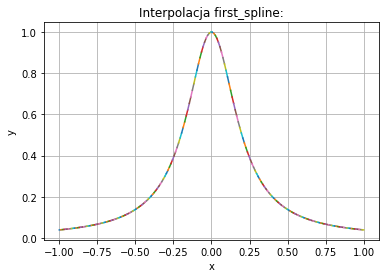

Błąd interpolacji dla implementownej funkcji: 0.0006308357686992672



In [84]:
a,b = first_spline(x_for_int,y_for_int)
f = [[b[i],a[i]] for i in range(len(a))]
yall = np.array([])
xall = np.array([])

for i in range(len(x_for_int)-1):
    x_new = np.linspace(x_for_int[i], x_for_int[i+1],100)
    y_first = np.array(PolyCoefficients(x_new, f[i]))
    plt.plot(x_new, y_first)
    yall = np.append(yall, y_first)
    xall = np.append(xall, x_new)

plt.title("Interpolacja first_spline:")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

x_for_error = np.linspace(-1,1, np.size(yall))
y_for_error = f_zad2(x_for_error)
error_first = L_inf(y_for_error, yall)
print("Błąd interpolacji dla implementownej funkcji: {}\n".format(error_first))

Błędy dla barycentrycznej: [0.1119061220207912, 0.0002341415378082079, 5.6941301468493855e-05, 1.3588382220874884e-05, 6.242264592337676e-06, 1.6142099008575883e-06, 4.6123844354983845e-07, 1.70297120849483e-09]

Błędy dla skejanej: [0.23584874789329524, 0.010305018441327918, 0.0025442677524655233, 0.0006308982734559709, 0.00027956047450239385, 0.00010039102341663497, 2.0698324923795752e-05, 4.378722601172669e-07]


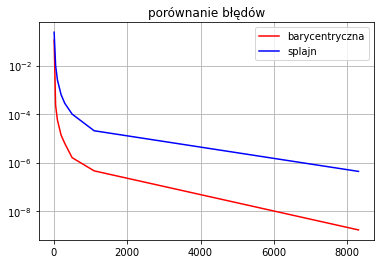

In [85]:
errors1= []
errors2= []

for el in [10, 50,100, 200, 300, 500, 1100, 8305]:

    x_for_int = np.linspace(-1,1,el)
    y_for_int = np.array(f_zad2(x_for_int))

    weights = bar_czeb_weights(el-1)
    y_bar = barycentric_inte(x_for_int,y_for_int,weights,x)
    errors1.append(L_inf(y, y_bar))
    
    a,b = first_spline(x_for_int,y_for_int)
    f = [[b[i],a[i]] for i in range(len(a))]

    yall = []
    xall = []

    for i in range(len(x_for_int)-1):
        x_new = np.linspace(x_for_int[i], x_for_int[i+1],1000)
        y_first = np.array(PolyCoefficients(x_new, f[i]))
        yall = np.append(yall, y_first)
        xall = np.append(xall, x_new)
        
    x_for_error = np.linspace(-1,1, np.size(yall))
    y_for_error = f_zad2(x_for_error)

    errors2.append( L_inf(y_for_error, yall))

print("Błędy dla barycentrycznej: {}\n".format(errors1))
print("Błędy dla skejanej: {}".format(errors2))
plt.plot([10, 50,100, 200, 300, 500, 1100, 8305], errors1, 'r', label = 'barycentryczna')
plt.plot([10, 50,100, 200, 300, 500, 1100, 8305], errors2, 'b', label =  'splajn')
plt.title("porównanie błędów")
plt.legend()
plt.yscale("log")
plt.grid()
plt.show()



In [86]:
print("Interpolacja sklejana wielomianami pierwszego stopnia\n"
      "prezentuje się zdecydowanie najgorzej. Błąd jest o co najmniej 1 rząd\nwielkości większy od interpolacji"
      "wielomianowej barycentrycznej, nie o węzłach czebyszewa, ale\no węzłach równoodległych"
      "to znaczy mniej dokładnej wersji interpolacji barycentrycznej.\n"
      "Interpolacja z pakietu scipy jest zdecydowanie najdokładniejsza\n"
      "Prawdopodobnie dla wyższych rzędów n zaobserwowany zostałby efekt rungego\n"
      "dla interpolacji barycentrycznej i błąd by wzrósł, kiedy dla splajnu dalej\n"
      "by malał, lecz obliczenia wyższych rzędów zajmują mojemu komputerowi zbyt wiele\n"
      "czasu, dlatego je pominęłam\n ")

Interpolacja sklejana wielomianami pierwszego stopnia
prezentuje się zdecydowanie najgorzej. Błąd jest o co najmniej 1 rząd
wielkości większy od interpolacjiwielomianowej barycentrycznej, nie o węzłach czebyszewa, ale
o węzłach równoodległychto znaczy mniej dokładnej wersji interpolacji barycentrycznej.
Interpolacja z pakietu scipy jest zdecydowanie najdokładniejsza
Prawdopodobnie dla wyższych rzędów n zaobserwowany zostałby efekt rungego
dla interpolacji barycentrycznej i błąd by wzrósł, kiedy dla splajnu dalej
by malał, lecz obliczenia wyższych rzędów zajmują mojemu komputerowi zbyt wiele
czasu, dlatego je pominęłam
 


***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.

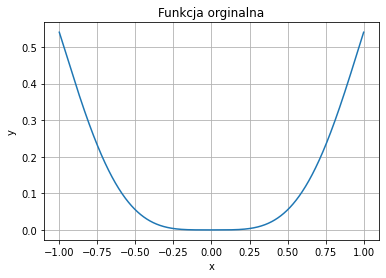

In [87]:
f_zad3 = lambda x: np.cos(x) * x **4
x = np.linspace(-1,1,1000)
y = np.array(f_zad3(x))

x_for_int = np.linspace(-1,1,n)
y_for_int = np.array(f_zad3(x_for_int))
n=200

plt.plot(x,y)
plt.title("Funkcja orginalna")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

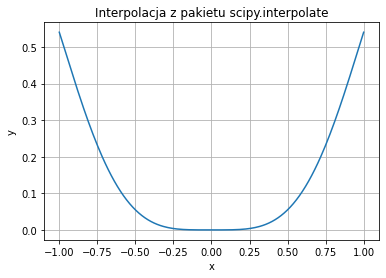

Błąd interpolacji  dla pakietowej funkcji: 3.3306690738754696e-16



In [88]:
y_sprep = scipy.interpolate.splprep([x_for_int, y_for_int],s=0)
y_scipy = new_points = scipy.interpolate.splev(y_sprep[1], y_sprep[0])

plt.plot(y_scipy[0], y_scipy[1])
plt.title("Interpolacja z pakietu scipy.interpolate")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
y_for_error = f_zad3(y_scipy[0])
error_scipy = L_inf(y_for_error, y_scipy[1])
print("Błąd interpolacji  dla pakietowej funkcji: {}\n".format(error_scipy))
#print("Interpolacja przeprowadzona łącznie dla {} punktów".format(np.size(y_scipy[1])))

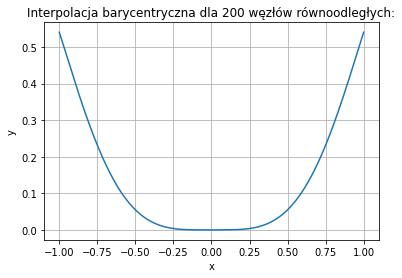

Błąd interpolacji dla implementownej funkcji: 1.2324956425634843e-05



In [89]:

weights = bar_czeb_weights(n-1)

y_bar = barycentric_inte(x_for_int,y_for_int,weights,x)

plt.plot(x,y_bar)
plt.title("Interpolacja barycentryczna dla 200 węzłów równoodległych:")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

error_bar = L_inf(y, y_bar)
print("Błąd interpolacji dla implementownej funkcji: {}\n".format(error_bar))

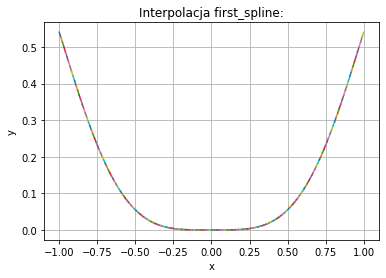

Błąd interpolacji dla implementownej funkcji: 0.00013265229675663015



In [90]:
a,b = first_spline(x_for_int,y_for_int)
f = [[b[i],a[i]] for i in range(len(a))]
yall = np.array([])
xall = np.array([])

for i in range(len(x_for_int)-1):
    x_new = np.linspace(x_for_int[i], x_for_int[i+1],100)
    y_first = np.array(PolyCoefficients(x_new, f[i]))
    plt.plot(x_new, y_first)
    yall = np.append(yall, y_first)
    xall = np.append(xall, x_new)

plt.title("Interpolacja first_spline:")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

x_for_error = np.linspace(-1,1, np.size(yall))
y_for_error = f_zad3(x_for_error)
error_first = L_inf(y_for_error, yall)
print("Błąd interpolacji dla implementownej funkcji: {}\n".format(error_first))

Błędy dla barycentrycznej: [0.0066958918601421075, 0.0002070312526522774, 5.0484574643169074e-05, 1.2324956425634843e-05, 5.523961282389024e-06, 1.6452345362218124e-06, 4.0593337045862253e-07, 4.602914271956138e-09]

Błędy dla skejanej: [0.015534980432588524, 0.0005239430059691963, 0.00012583309467972814, 2.9992387057031777e-05, 1.2815124062870442e-05, 5.303902024134111e-06, 2.402347917707104e-06, 3.1794066646106955e-07]


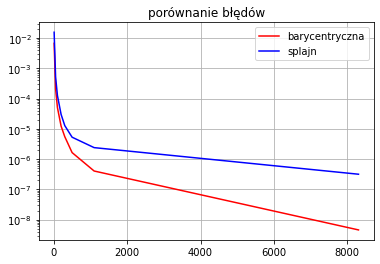

In [91]:
errors1= []
errors2= []

for el in [10, 50,100, 200, 300, 500, 1100, 8305]:

    x_for_int = np.linspace(-1,1,el)
    y_for_int = np.array(f_zad3(x_for_int))

    weights = bar_czeb_weights(el-1)
    y_bar = barycentric_inte(x_for_int,y_for_int,weights,x)
    errors1.append(L_inf(y, y_bar))
    
    a,b = first_spline(x_for_int,y_for_int)
    f = [[b[i],a[i]] for i in range(len(a))]

    yall = []
    xall = []

    for i in range(len(x_for_int)-1):
        x_new = np.linspace(x_for_int[i], x_for_int[i+1],1000)
        y_first = np.array(PolyCoefficients(x_new, f[i]))
        yall = np.append(yall, y_first)
        xall = np.append(xall, x_new)
        
    x_for_error = np.linspace(-1,1, np.size(yall))
    y_for_error = f_zad3(x_for_error)

    errors2.append( L_inf(y_for_error, yall))

print("Błędy dla barycentrycznej: {}\n".format(errors1))
print("Błędy dla skejanej: {}".format(errors2))
plt.plot([10, 50,100, 200, 300, 500, 1100, 8305], errors1, 'r', label = 'barycentryczna')
plt.plot([10, 50,100, 200, 300, 500, 1100, 8305], errors2, 'b', label =  'splajn')
plt.title("porównanie błędów")
plt.legend()
plt.yscale("log")
plt.grid()
plt.show()

In [92]:
print("Sytuacja analogiczna dla poprzedniej, lecz pewnie dla tej funkcji\n"
      "efekt rungego by nie wystąpił, jako że funkcja naturalnie ma 'ogony'.")

Sytuacja analogiczna dla poprzedniej, lecz pewnie dla tej funkcji
efekt rungego by nie wystąpił, jako że funkcja naturalnie ma 'ogony'.


***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.

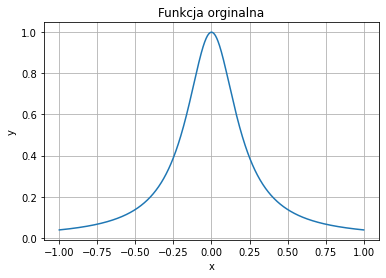

In [116]:
x = np.linspace(-1,1,1000)
y = np.array(f_zad2(x))

plt.plot(x,y)
plt.title("Funkcja orginalna")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

x_for_cubic = np.linspace(-1,1,400)
y_for_cubic = f_zad2(x_for_cubic)


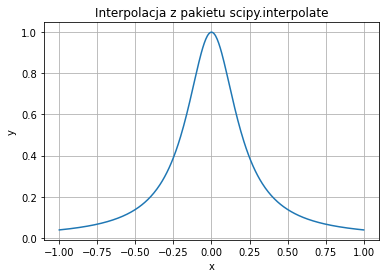

Błąd interpolacji  dla pakietowej funkcji: 4.440892098500626e-16



In [94]:
y_sprep = scipy.interpolate.splprep([x_for_cubic, y_for_cubic],s=0)
y_scipy = scipy.interpolate.splev(y_sprep[1], y_sprep[0])

plt.plot(x_for_cubic, y_scipy[1])
plt.title("Interpolacja z pakietu scipy.interpolate")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
y_for_error = f_zad2(y_scipy[0])
error_scipy = L_inf(y_for_error, y_scipy[1])
print("Błąd interpolacji  dla pakietowej funkcji: {}\n".format(error_scipy))


Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  8.48092948261419e-15


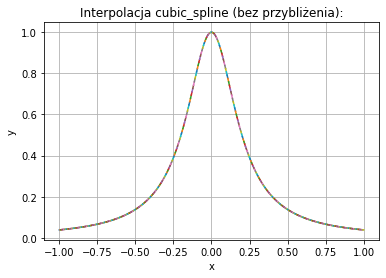

Błąd interpolacji dla implementownej funkcji: 9.11253093341946e-05



In [95]:
from main import cubic_spline

b, c, d = cubic_spline(x_for_cubic,y_for_cubic)

f = [[y_for_cubic[i], b[i],c[i], d[i]] for i in range(len(b))]
yall = np.array([])
xall = np.array([])


for i in range(len(x_for_cubic)-1):
    x_new = np.linspace(x_for_cubic[i], x_for_cubic[i+1],100)
    y_cubic = np.array(PolyCoefficientsCubic(x_new, x_for_cubic[i], f[i]))
    plt.plot(x_new, y_cubic)
    yall = np.append(yall, y_cubic)
    xall = np.append(xall, x_new)

plt.title("Interpolacja cubic_spline:")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

x_for_error = np.linspace(-1,1, np.size(yall))
y_for_error = f_zad2(x_for_error)
error_first = L_inf(y_for_error, yall)
print("Błąd interpolacji dla implementownej funkcji: {}\n".format(error_first))


In [ ]:
errors1= []
errors2= []

for el in [10, 20, 50, 100, 200, 300, 320, 500, 800 ]:

    x_for_cubic = np.linspace(-1,1,el)
    y_for_cubic = np.array(f_zad2(x_for_cubic))

    b, c, d = cubic_spline(x_for_cubic,y_for_cubic)

    f = [[y_for_cubic[i], b[i],c[i], d[i]] for i in range(len(b))]
    yall = np.array([])
    xall = np.array([])

    for i in range(len(x_for_cubic)-1):
        x_new = np.linspace(x_for_cubic[i], x_for_cubic[i+1],100)
        y_cubic = np.array(PolyCoefficientsCubic(x_new,x_for_cubic[i], f[i]))
        yall = np.append(yall, y_cubic)
        xall = np.append(xall, x_new)

    x_for_error = np.linspace(-1,1, np.size(yall))
    y_for_error = f_zad2(x_for_error)
    errors1.append(L_inf(y_for_error, yall))

    
    
    a,b = first_spline(x_for_cubic,y_for_cubic)
    f = [[b[i],a[i]] for i in range(len(a))]

    yall = []
    xall = []

    for i in range(len(x_for_cubic)-1):
        x_new = np.linspace(x_for_cubic[i], x_for_cubic[i+1],100)
        y_first = np.array(PolyCoefficients(x_new, f[i]))
        yall = np.append(yall, y_first)
        xall = np.append(xall, x_new)
        
    x_for_error = np.linspace(-1,1, np.size(yall))
    y_for_error = f_zad2(x_for_error)

    errors2.append( L_inf(y_for_error, yall))
    
print("Błędy dla 3 stopnia: {}\n".format(errors1))
print("Błędy dla 1 stopnia: {}".format(errors2))


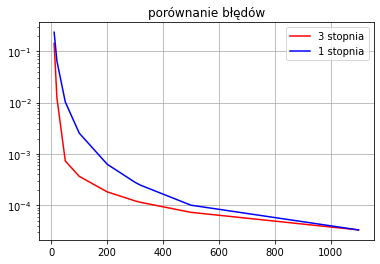

In [98]:
plt.plot([10, 20, 50, 100, 200, 300, 320, 500, 800], errors1, 'r', label = '3 stopnia')
plt.plot([10, 20, 50, 100, 200, 300, 320, 500, 800 ], errors2, 'b', label =  '1 stopnia')
plt.title("porównanie błędów")
plt.legend()
plt.yscale("log")
plt.grid()
plt.show()

In [99]:
print("Interpolacja za pomocą splajnu 3 stopnia w pewnych przedziałach jest o ok 1 rząd wielkości dokładniejsza, \nniż ta 1 stopnia"
     "Ale wygląda, że błędy wraz z rosnącym n się do siebie zbliżają (dla 3 stopnia zwalnia zminiesznie się)\n Dla małych wartości n interpolacja 3 stopnia jest dużo lepsza")

Interpolacja za pomocą splajnu 3 stopnia w pewnych przedziałach jest o ok 1 rząd wielkości dokładniejsza, 
niż ta 1 stopniaAle wygląda, że błędy wraz z rosnącym n się do siebie zbliżają (dla 3 stopnia zwalnia zminiesznie się)


***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


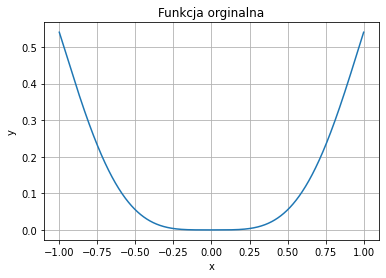

In [100]:
x = np.linspace(-1,1,1000)
y = np.array(f_zad3(x))

plt.plot(x,y)
plt.title("Funkcja orginalna")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

x_for_cubic = np.linspace(-1,1,200)
y_for_cubic = f_zad3(x_for_cubic)


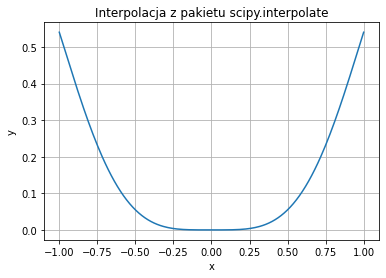

Błąd interpolacji  dla pakietowej funkcji: 3.3306690738754696e-16



In [101]:

y_sprep = scipy.interpolate.splprep([x_for_cubic, y_for_cubic],s=0)
y_scipy = new_points = scipy.interpolate.splev(y_sprep[1], y_sprep[0])

plt.plot(y_scipy[0], y_scipy[1])
plt.title("Interpolacja z pakietu scipy.interpolate")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
y_for_error = f_zad3(y_scipy[0])
error_scipy = L_inf(y_for_error, y_scipy[1])
print("Błąd interpolacji  dla pakietowej funkcji: {}\n".format(error_scipy))


Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  1.2815744444133687e-15


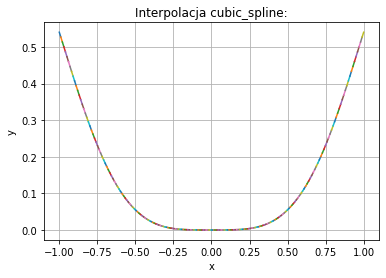

Błąd interpolacji dla implementownej funkcji: 0.00013265229675663015



In [102]:


b, c, d = cubic_spline(x_for_cubic,y_for_cubic)

f = [[y_for_cubic[i], b[i],c[i], d[i]] for i in range(len(b))]
yall = np.array([])
xall = np.array([])


for i in range(len(x_for_cubic)-1):
    x_new = np.linspace(x_for_cubic[i], x_for_cubic[i+1],100)
    y_cubic = np.array(PolyCoefficientsCubic(x_new, x_for_cubic[i], f[i]))
    plt.plot(x_new, y_cubic) 
    yall = np.append(yall, y_cubic)
    xall = np.append(xall, x_new)

plt.title("Interpolacja cubic_spline:")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

x_for_error = np.linspace(-1,1, np.size(yall))
y_for_error = f_zad3(x_for_error)
error_first = L_inf(y_for_error, yall)
print("Błąd interpolacji dla implementownej funkcji: {}\n".format(error_first))



Jacobi Method Output:
Number of Iterations:  52
Norm of Difference:  0.0
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  2.95149065920002e-16
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  6.521179279553817e-16
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  5.031056975836117e-16
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  1.2815744444133687e-15
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  1.1355484503437167e-15
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  1.4619971303219556e-15
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  1.808995558276564e-15
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  2.351698634257424e-15
Błędy dla 3 stopnia: [0.002148269365479516, 0.0012905303047322514, 0.0005334220020875025, 0.0002662140546031422, 0.00013265229675663015, 8.830074240950836e-05, 8.276513331550994e-05

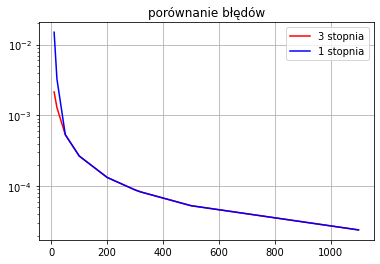

In [106]:
errors1= []
errors2= []

for el in [10, 20, 50, 100, 200, 300, 320, 500, 1100]:

    x_for_cubic = np.linspace(-1,1,el)
    y_for_cubic = np.array(f_zad3(x_for_cubic))

    b, c, d = cubic_spline(x_for_cubic,y_for_cubic)

    f = [[y_for_cubic[i], b[i],c[i], d[i]] for i in range(len(b))]
    yall = np.array([])
    xall = np.array([])

    for i in range(len(x_for_cubic)-1):
        x_new = np.linspace(x_for_cubic[i], x_for_cubic[i+1],100)
        y_cubic = np.array(PolyCoefficientsCubic(x_new,x_for_cubic[i], f[i]))
        yall = np.append(yall, y_cubic)
        xall = np.append(xall, x_new)

    x_for_error = np.linspace(-1,1, np.size(yall))
    y_for_error = f_zad3(x_for_error)
    errors1.append(L_inf(y_for_error, yall))

    
    
    a,b = first_spline(x_for_cubic,y_for_cubic)
    f = [[b[i],a[i]] for i in range(len(a))]

    yall = []
    xall = []

    for i in range(len(x_for_cubic)-1):
        x_new = np.linspace(x_for_cubic[i], x_for_cubic[i+1],100)
        y_first = np.array(PolyCoefficients(x_new, f[i]))
        yall = np.append(yall, y_first)
        xall = np.append(xall, x_new)
        
    x_for_error = np.linspace(-1,1, np.size(yall))
    y_for_error = f_zad3(x_for_error)

    errors2.append( L_inf(y_for_error, yall))

print("Błędy dla 3 stopnia: {}\n".format(errors1))
print("Błędy dla 1 stopnia: {}".format(errors2))
plt.plot([10, 20, 50, 100, 200, 300, 320, 500, 1100 ], errors1, 'r', label = '3 stopnia')
plt.plot([10, 20, 50, 100, 200, 300, 320, 500, 1100], errors2, 'b', label =  '1 stopnia')
plt.title("porównanie błędów")
plt.legend()
plt.yscale("log")
plt.grid()
plt.show()

In [107]:
print("Obie implementacje prezentują się bardzo podobnie (oraz działają lepiej, niż dla poprzedniej funkcji, przynjmniej dla\n już trochę wyższych n )")

Obie implementacje prezentują się bardzo podobnie (oraz działają lepiej, niż dla poprzedniej funkcji)


***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

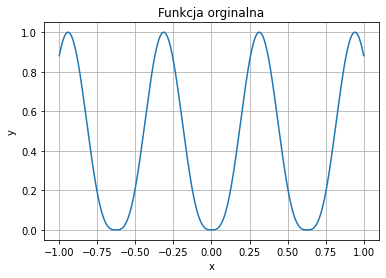

In [108]:
f_zad7 = lambda x: (abs(np.sin(5*x)))**3

x_for_cubic = np.linspace(-1,1,300)
y_for_cubic = f_zad7(x_for_cubic)


x = np.linspace(-1,1,1000)
y = np.array(f_zad7(x))

plt.plot(x,y)
plt.title("Funkcja orginalna")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


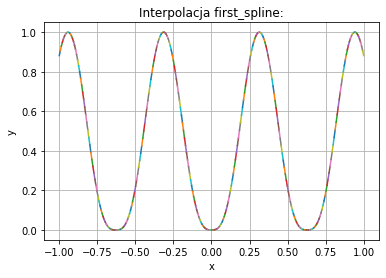

Błąd interpolacji dla implementownej funkcji: 0.9907267205679267



In [109]:
a,b = first_spline(x_for_cubic,y_for_cubic)
f = [[b[i],a[i]] for i in range(len(a))]
yall = np.array([])
xall = np.array([])

for i in range(len(x_for_cubic)-1):
    x_new = np.linspace(x_for_cubic[i], x_for_cubic[i+1],100)
    y_first = np.array(PolyCoefficients(x_new, f[i]))
    plt.plot(x_new, y_first)
    yall = np.append(yall, y_first)
    xall = np.append(xall, x_new)

plt.title("Interpolacja first_spline:")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

x_for_error = np.linspace(-1,1, np.size(yall))
y_for_error = f_zad3(x_for_error)
error_first = L_inf(y_for_error, yall)
print("Błąd interpolacji dla implementownej funkcji: {}\n".format(error_first))

Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  2.479790989013434e-14


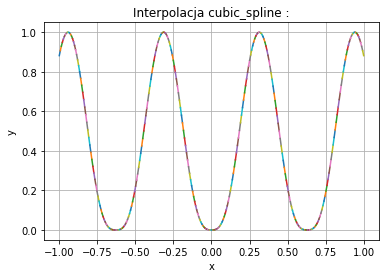

Błąd interpolacji dla implementownej funkcji: 0.0003514093419062503



In [110]:

b, c, d = cubic_spline(x_for_cubic,y_for_cubic)

f = [[y_for_cubic[i], b[i],c[i], d[i]] for i in range(len(b))]
yall = np.array([])
xall = np.array([])


for i in range(len(x_for_cubic)-1):
    x_new = np.linspace(x_for_cubic[i], x_for_cubic[i+1],100)
    y_cubic = np.array(PolyCoefficientsCubic(x_new, x_for_cubic[i], f[i]))
    plt.plot(x_new, y_cubic)
    yall = np.append(yall, y_cubic)
    xall = np.append(xall, x_new)

plt.title("Interpolacja cubic_spline :")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

x_for_error = np.linspace(-1,1, np.size(yall))
y_for_error = f_zad7(x_for_error)
error_first = L_inf(y_for_error, yall)
print("Błąd interpolacji dla implementownej funkcji: {}\n".format(error_first))

Jacobi Method Output:
Number of Iterations:  47
Norm of Difference:  0.0
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  1.2809491335957507e-14
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  9.907924120689998e-15
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  1.3102513289393096e-14
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  2.963033969552697e-14
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  2.479790989013434e-14
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  3.235087070765176e-14
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  3.934969341025113e-14
Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  5.3959358927185816e-14
Błędy dla 3 stopnia: [0.2966150674354405, 0.03998090788766351, 0.00419272384618985, 0.0010603404200592026, 0.0005277906666759646, 0.0003514093419062503, 0.0003295660594716532, 0.00

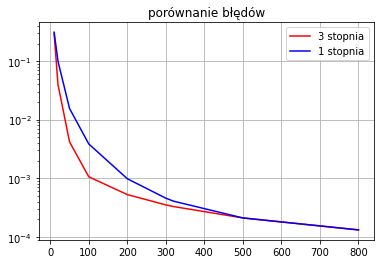

In [113]:
errors1= []
errors2= []

for el in [10, 20, 50, 100, 200, 300, 320, 500, 800 ]:

    x_for_cubic = np.linspace(-1,1,el)
    y_for_cubic = np.array(f_zad7(x_for_cubic))

    b, c, d = cubic_spline(x_for_cubic,y_for_cubic)

    f = [[y_for_cubic[i], b[i],c[i], d[i]] for i in range(len(b))]
    yall = np.array([])
    xall = np.array([])

    for i in range(len(x_for_cubic)-1):
        x_new = np.linspace(x_for_cubic[i], x_for_cubic[i+1],100)
        y_cubic = np.array(PolyCoefficientsCubic(x_new,x_for_cubic[i], f[i]))
        yall = np.append(yall, y_cubic)
        xall = np.append(xall, x_new)

    x_for_error = np.linspace(-1,1, np.size(yall))
    y_for_error = f_zad7(x_for_error)
    errors1.append(L_inf(y_for_error, yall))

    
    
    a,b = first_spline(x_for_cubic,y_for_cubic)
    f = [[b[i],a[i]] for i in range(len(a))]

    yall = []
    xall = []

    for i in range(len(x_for_cubic)-1):
        x_new = np.linspace(x_for_cubic[i], x_for_cubic[i+1],100)
        y_first = np.array(PolyCoefficients(x_new, f[i]))
        yall = np.append(yall, y_first)
        xall = np.append(xall, x_new)
        
    x_for_error = np.linspace(-1,1, np.size(yall))
    y_for_error = f_zad7(x_for_error)

    errors2.append( L_inf(y_for_error, yall))

print("Błędy dla 3 stopnia: {}\n".format(errors1))
print("Błędy dla 1 stopnia: {}".format(errors2))
plt.plot([10, 20, 50, 100, 200, 300, 320, 500, 800 ], errors1, 'r', label = '3 stopnia')
plt.plot([10, 20, 50, 100, 200, 300, 320, 500, 800 ], errors2, 'b', label =  '1 stopnia')
plt.title("porównanie błędów")
plt.legend()
plt.yscale("log")
plt.grid()
plt.show()

In [114]:
print("Błędy dla obu splajnów wzraz z zwiększeniem n wyrównują się, lecz ponownie, dla małych n splany 3 stopnia są lepsze")

Błędy dla obu splajnów wzraz z zwiększeniem n wyrównują się, lecz ponownie, dla małych n splany 3 stopnia są lepsze


In [115]:
print("Podsumowanie: \nZe względu na ograniczenia techniczne, nie jestem w stanie zaobserwować, jak poszczególnie przybliżenia\n"
     "zachowują się dla większej ilości węzłów, lecz mogę stwerdzić, że przy małych n, (nie licząc oczywieście interpolacji)\n"
     "pakietowej) najlepiej spisuje się interpolacja barycentryczna, nawet pomimo bycia przeprowadzoną na węzłach równoodległych.\n"
     "Najpewniej dla wyższych rzędów n, dla poszczególnych funkcji błąd interpolacji barycentrycznej wzrósłby, gdzie dla funkcji\n"
     "sklejanych dalej by malał. Funkcja sklejana wielomianami 3 rzędu dla niektórych funkcji jest lepsza niz ta sklejana \nwielomianami"
     "1 rzędu, ale jednak wymaga ona więcej obliczeń, a co za tym idzie i więcej czasu.\nWydaje mi się, że funkcji sklejanych powinno\n"
     "się używać dla wyższych n, najlepiej 1 lub 2 stopnia - orgraniczyłoby to wpływ efektu rungego, przy raczej dobrej złożoności\n"
     "obliczeniowej, jednak dla niższych n lepiej jest używać zwykłych interpolacji wielomianowych, względnie korzystać z funkcji\n"
     "już zainplementowanych. ")

Podsumowanie: 
Ze względu na ograniczenia techniczne, nie jestem w stanie zaobserwować, jak poszczególnie przybliżenia
zachowują się dla większej ilości węzłów, lecz mogę stwerdzić, że przy małych n, (nie licząc oczywieście interpolacji)
pakietowej) najlepiej spisuje się interpolacja barycentryczna, nawet pomimo bycia przeprowadzoną na węzłach równoodległych.
Najpewniej dla wyższych rzędów n, dla poszczególnych funkcji błąd interpolacji barycentrycznej wzrósłby, gdzie dla funkcji
sklejanych dalej by malał. Funkcja sklejana wielomianami 3 rzędu dla niektórych funkcji jest lepsza niz ta sklejana 
wielomianami1 rzędu, ale jednak wymaga ona więcej obliczeń, a co za tym idzie i więcej czasu.
Wydaje mi się, że funkcji sklejanych powinno
się używać dla wyższych n, najlepiej 1 lub 2 stopnia - orgraniczyłoby to wpływ efektu rungego, przy raczej dobrej złożoności
obliczeniowej, jednak dla niższych n lepiej jest używać zwykłych interpolacji wielomianowych, względnie korzystać z funkcji
już zainpl